In [1]:
experimento = 'Experimento para entrenar un modelo solo con las clases 8, 10, 11. Part. 2'

In [3]:
#Importamos las librerias necesarias
import torch
import numpy as np
import pandas as pd
import Modulo_MLP
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split

In [4]:
def evaluate_aux(model, test_loader):
        """
        Evalua el modelo previamente entrnado
        Argumentos de entrada: modelo, conjunto de test
        """
        model.eval()
        model.to(device)
        acc = []
        with torch.no_grad():
            for batch in test_loader:
                X, y = batch
                y_hat = model(X.float())
                acc.append((y == torch.argmax(y_hat, axis=1)).sum().item() / len(y))

        return np.mean(acc)


In [5]:
#device config
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [6]:
#Cargamos el data set
datas = pd.read_csv('C:/Users/jaime/OneDrive - Universidad de Málaga/Escritorio/Jaime/TFG/HuGaDB-master/HuGaDB_v2_Digest/DataFrameFinal.csv')

#Elimino las filas con algún valor de columna vacio 
datas = datas.dropna()

In [2]:
print(f'\033[5;35m EXPERIMENTO --> {experimento} \033[0;m')

 EXPERIMENTO --> Experimento para entrenar un modelo solo con las clases 8, 10, 11. Part. 2 


In [8]:
#hyper parameters
    #Numero de muestras del todo el dataset, numero de entradas de la red, numero de clases a clasificar, 
    # numero de neuronas en la capa oculta, numero de epocas, numero de lotes, tasa de aprendizaje, k del K-Fold

nTest = 0.2   
nSamples = 50000

nTrain = 1-nTest
nSamples =  round(nSamples / nTrain)

input_size = 38
num_classes = 12

hidden_size = 100
num_epochs = 500
batch_size = 256

learning_rate = 0.01

num_splits = 10

class_names = ['Standing', 'Up by elevator',  'Down by elevator'] 
labels = [8,10,11]

In [9]:
# Obtengo un subconjunto del data set original 
# TODO Conocer la distribución de cada clase 
df = datas
df = df[nSamples:(nSamples*2)]

In [10]:
df = df[(df.act == 8) | (df.act == 10) | (df.act == 11)]

In [11]:
#Divido el conjunto de muestras en variable clasificatoria(y) y las demas(X)
X = df.drop(['act'], axis = 'columns')
# X.head()

y = df.act
# y.head()

num of samples: 20837
[12176, 4924, 3737]


<BarContainer object of 3 artists>

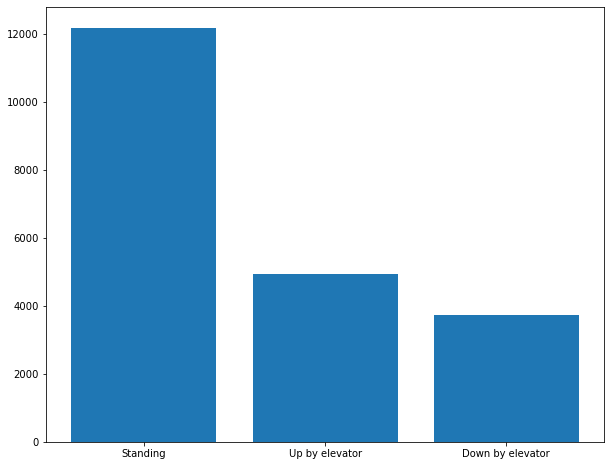

In [12]:
x_values = class_names

y_values = []

y_values.append((df[(df.act == 8)]).shape[0])
y_values.append((df[(df.act == 10)]).shape[0])
y_values.append((df[(df.act == 11)]).shape[0])
print(f'num of samples: {sum(y_values)}')
print(y_values)
plt.figure(figsize=(10,8))
plt.bar(x_values, y_values, width=0.8)            

In [13]:
# # Porcentaje de cada clase en un conjunto de datos
# s = sum(y_values)
# w = 0
# for x in y_values:
#     y = x * 100
#     z = y / s
#     w = w + z
#     print(f'La muestra es {x} y su porcentaje es {z}')
# print(f'Total: {w}')

In [14]:
#Obtengo los valores de los conjuntos anteriores
X_val = X.values
y_val = y.values

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_val,y_val,test_size=nTest, random_state=0)

In [16]:
X_tensor = torch.tensor(X_test).cuda()
y_tensor = torch.tensor(y_test).cuda()
testset = torch.utils.data.TensorDataset(X_tensor, y_tensor)
test_loader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False)

In [17]:
# #'modelo_final_'+str(now.date())+'_'+str(round(acc_test, 4))+'_Train'+'.zip'
modelo_pre_train = torch.jit.load('modelo_final_2021-09-01_0.7466_Train_pt_1.zip')
evaluate_aux(modelo_pre_train, test_loader)
# modelo_pre_train = None

0.5754442401960784

  0%|          | 0/500 [00:00<?, ?it/s]

######### Launch with 62500 Samples, 500 Epochs, 256      Batch, 10 Splits, 12 Class, 100 Hidden neurons ######### 
Entro en modelo preentrnado


loss 0.88492 acc 0.57963: 100%|██████████| 500/500 [08:10<00:00,  1.08it/s]

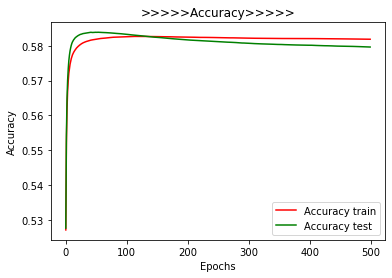

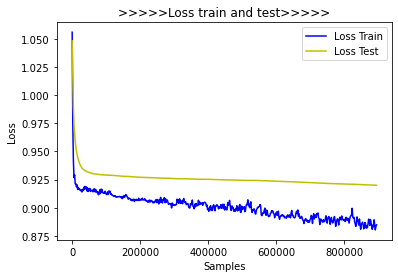

Accuracy de validación con kFold 0.5766383247001091
Accuracy Train: 0.5795188673585698 
Accuracy Test: 0.581573896353167 
Diferencia entre train y test: -0.0020550289945971967

 


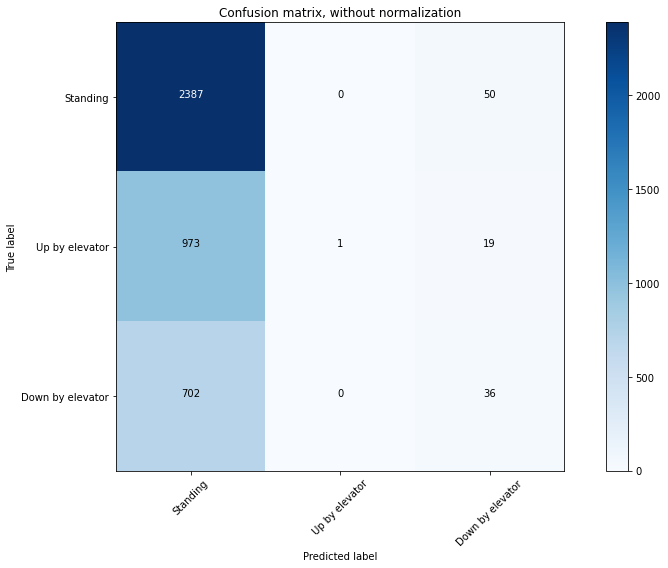

  0%|          | 0/500 [00:00<?, ?it/s]

Entro en modelo preentrnado


loss 0.89219 acc 0.58838: 100%|██████████| 500/500 [07:37<00:00,  1.10it/s]

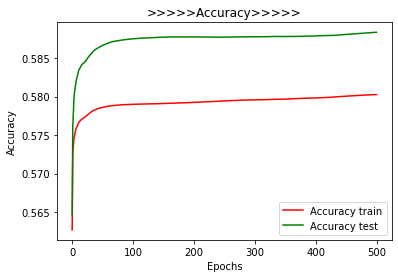

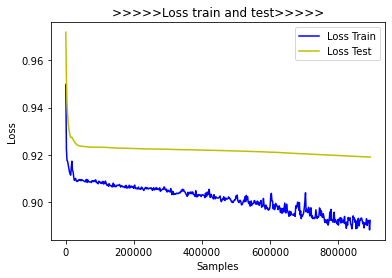

Accuracy de validación con kFold 0.5835243150218103
Accuracy Train: 0.581618573399724 
Accuracy Test: 0.5866122840690979 
Diferencia entre train y test: -0.00499371066937393

 


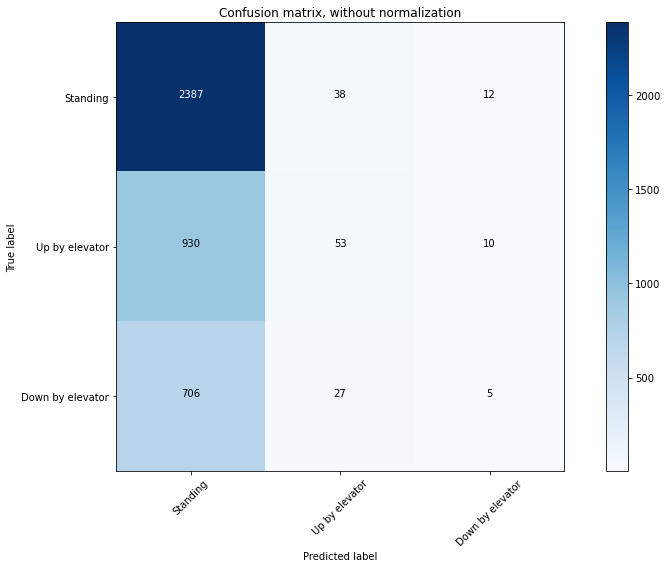

  0%|          | 0/500 [00:00<?, ?it/s]

Entro en modelo preentrnado


loss 0.88028 acc 0.58142: 100%|██████████| 500/500 [07:36<00:00,  1.11it/s]

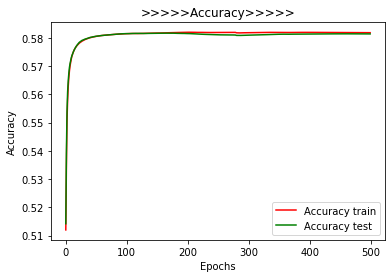

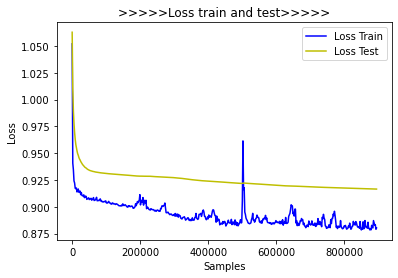

Accuracy de validación con kFold 0.5814661145946929
Accuracy Train: 0.5813186153938449 
Accuracy Test: 0.5897312859884837 
Diferencia entre train y test: -0.008412670594638794

 


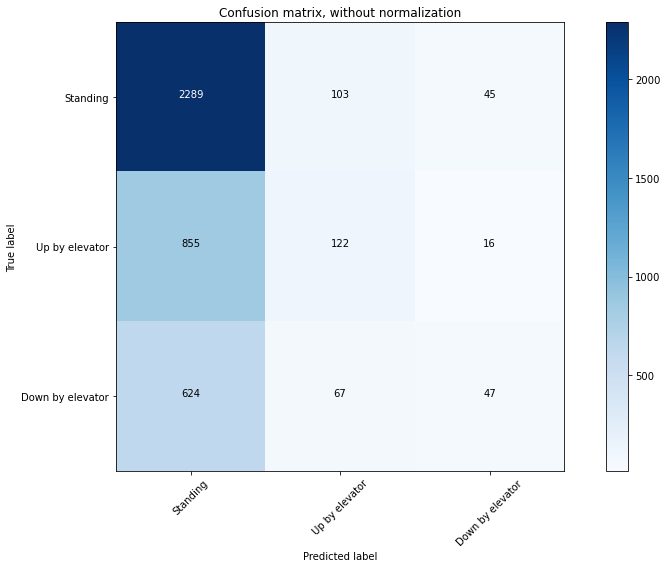

  0%|          | 0/500 [00:00<?, ?it/s]

Entro en modelo preentrnado


loss 0.89676 acc 0.58140: 100%|██████████| 500/500 [07:39<00:00,  1.08it/s]

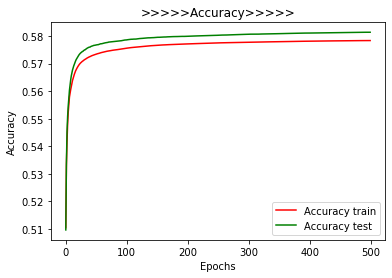

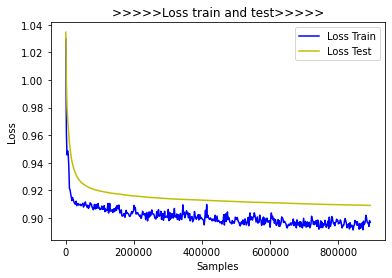

Accuracy de validación con kFold 0.5826691572382771
Accuracy Train: 0.5819785230067791 
Accuracy Test: 0.585172744721689 
Diferencia entre train y test: -0.003194221714909906

 


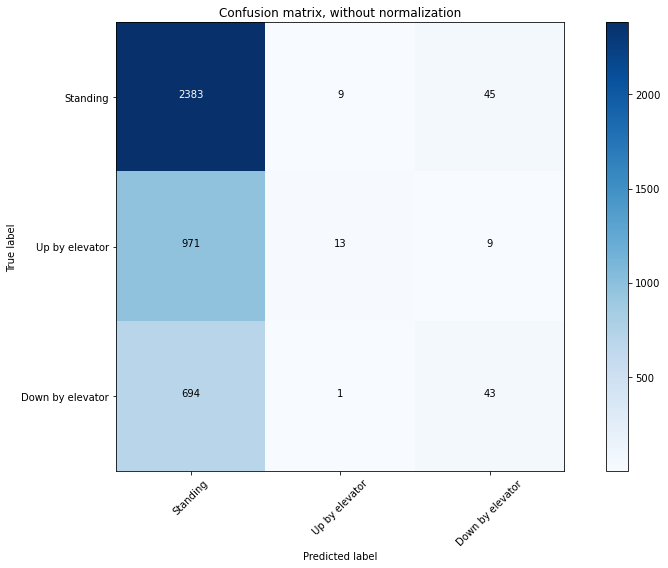

  0%|          | 0/500 [00:00<?, ?it/s]

Entro en modelo preentrnado


loss 0.88255 acc 0.56868:  30%|███       | 150/500 [02:18<05:21,  1.09it/s]

OVERFFITING|Epochs: 150/500|Loss test old: 0.9319110409296828|loss test new: 0.9319230544567109


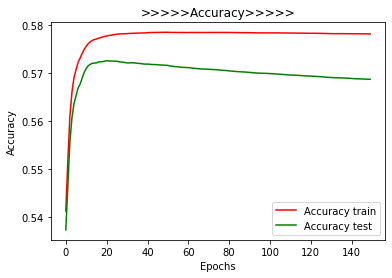

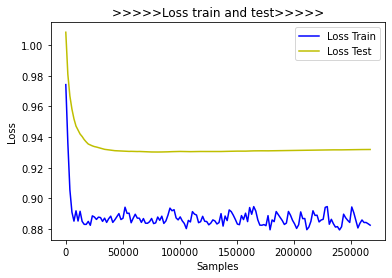

Accuracy de validación con kFold 0.5800223214285716
Accuracy Train: 0.5791589177515147 
Accuracy Test: 0.5818138195777351 
Diferencia entre train y test: -0.0026549018262204127

 


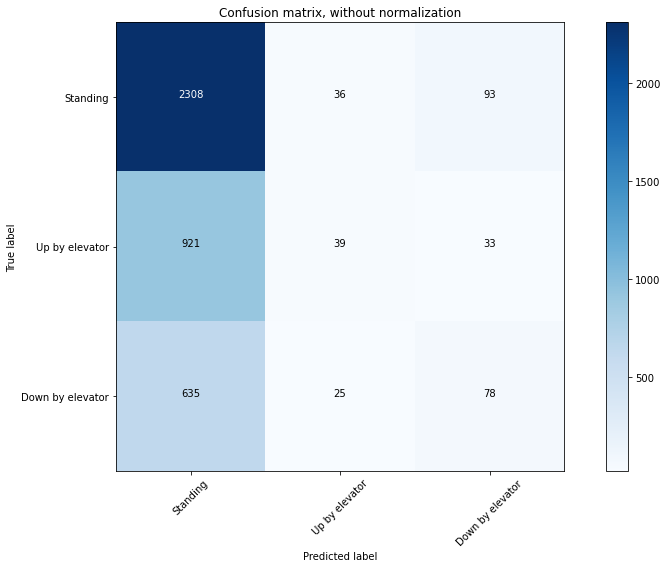

  0%|          | 0/500 [00:00<?, ?it/s]

Entro en modelo preentrnado


loss 0.87404 acc 0.57511: 100%|██████████| 500/500 [07:45<00:00,  1.06it/s]

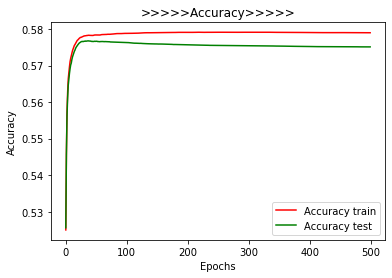

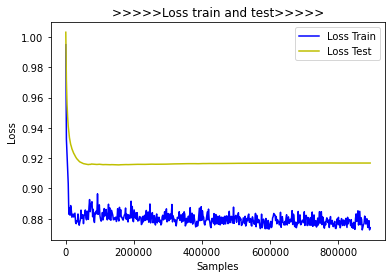

Accuracy de validación con kFold 0.5789088058887678
Accuracy Train: 0.5781390605315256 
Accuracy Test: 0.5844529750479847 
Diferencia entre train y test: -0.006313914516459018

 


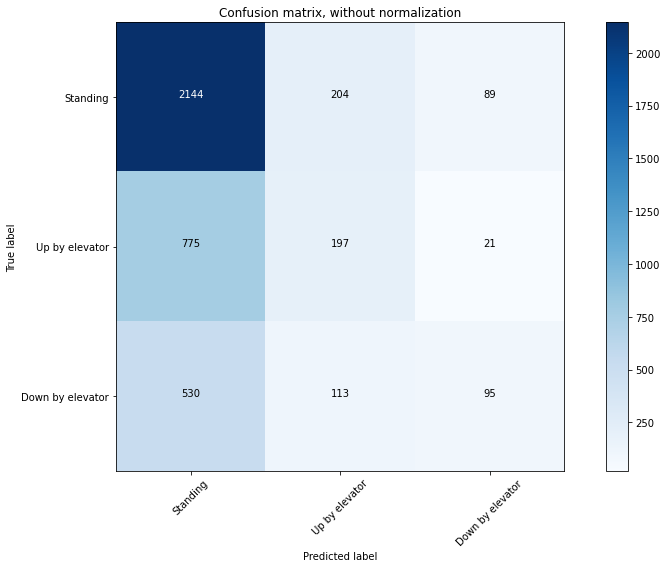

  0%|          | 0/500 [00:00<?, ?it/s]

Entro en modelo preentrnado


loss 0.87170 acc 0.58333: 100%|██████████| 500/500 [07:38<00:00,  1.10it/s]

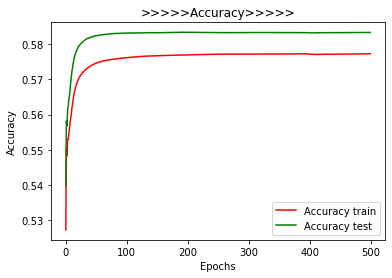

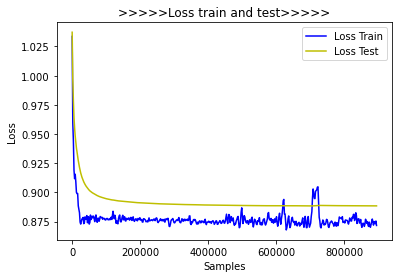

Accuracy de validación con kFold 0.5808092917510516
Accuracy Train: 0.5829383886255924 
Accuracy Test: 0.588531669865643 
Diferencia entre train y test: -0.0055932812400505405

 


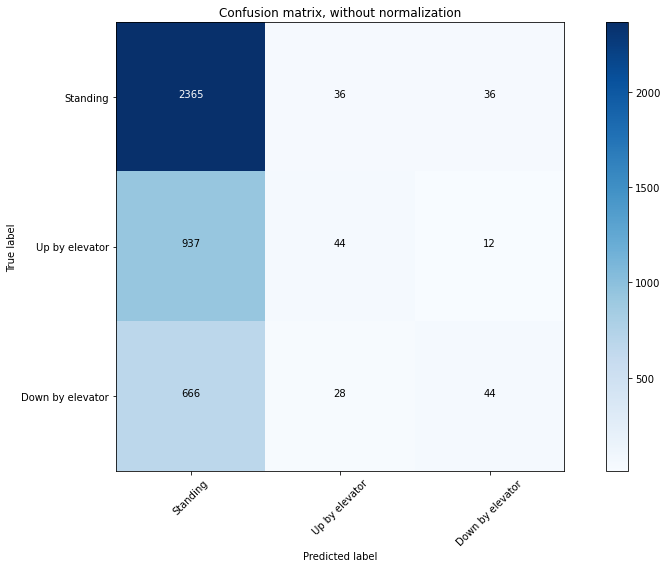

  0%|          | 0/500 [00:00<?, ?it/s]

Entro en modelo preentrnado


loss 0.86868 acc 0.58115: 100%|██████████| 500/500 [07:36<00:00,  1.10it/s]

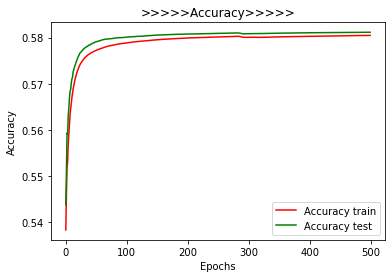

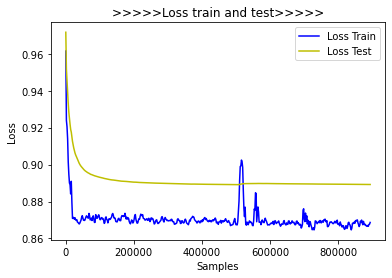

Accuracy de validación con kFold 0.5810552199768266
Accuracy Train: 0.5811386405903174 
Accuracy Test: 0.585172744721689 
Diferencia entre train y test: -0.004034104131371619

 


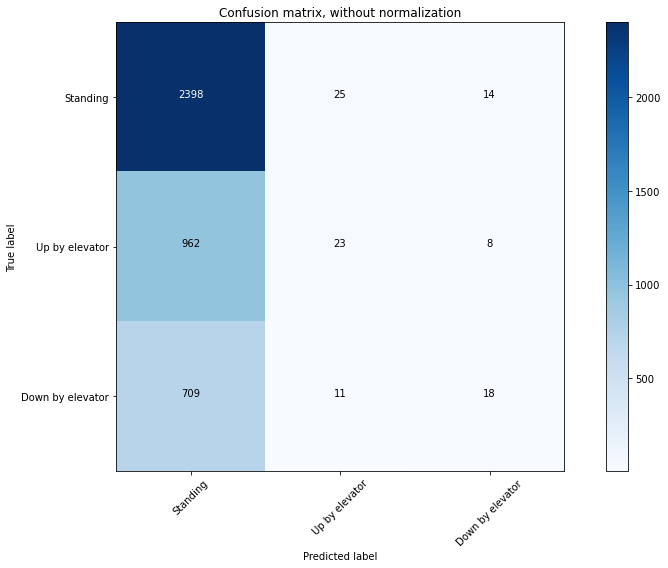

  0%|          | 0/500 [00:00<?, ?it/s]

Entro en modelo preentrnado


loss 0.87241 acc 0.57709: 100%|██████████| 500/500 [07:38<00:00,  1.10it/s]

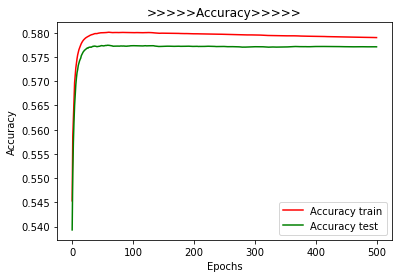

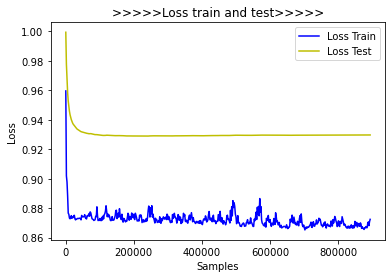

Accuracy de validación con kFold 0.5802459143644736
Accuracy Train: 0.5762793208950747 
Accuracy Test: 0.5844529750479847 
Diferencia entre train y test: -0.008173654152909937

 


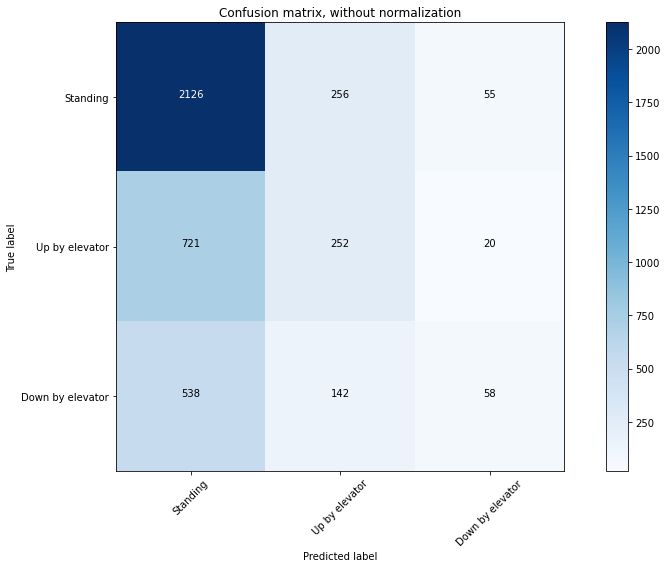

Entro en modelo preentrnado


loss 0.85482 acc 0.57832: 100%|██████████| 500/500 [07:37<00:00,  1.09it/s]

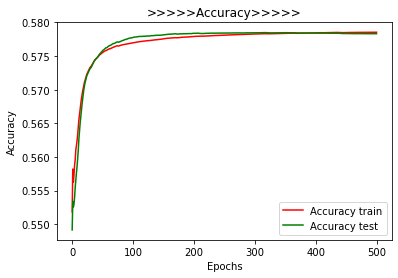

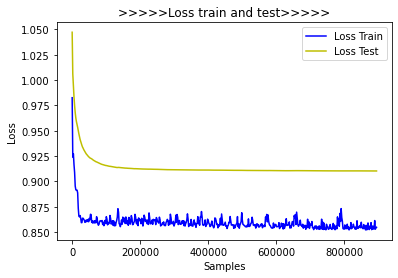

Accuracy de validación con kFold 0.5804682322686856
Accuracy Train: 0.5772391865138881 
Accuracy Test: 0.5822936660268714 
Diferencia entre train y test: -0.005054479512983323

 


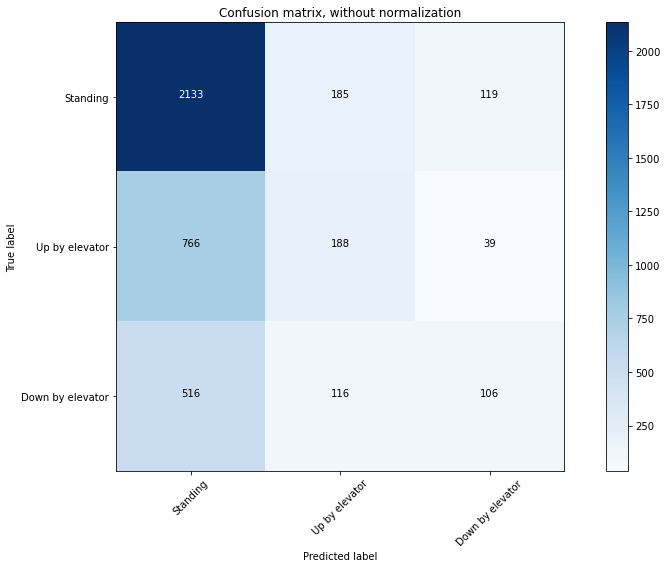

Time: 1h 11m 58s


In [18]:
print(f'\033[1;36m######### Launch with {nSamples} Samples, {num_epochs} Epochs, {batch_size}\
      Batch, {num_splits} Splits, {num_classes} Class, {hidden_size} Hidden neurons ######### \033[0;m')
#  Llamo al metodo que implementa el K-fold
time_mean, modelo_trained, loss_test_list, list_acc_test = Modulo_MLP.CV_Kfold(device, num_classes, input_size, X_train, 
                                                               y_train,hidden_size,num_splits,batch_size,num_epochs,
                                                               learning_rate, (X_test, y_test), modelo_pre_train, class_names, labels)

In [ ]:
#Libera toda la memoria caché no utilizada de PyTorch
torch.cuda.empty_cache()